In [28]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt 
import pickle

## TODO:-
1. fetch splitted data 
2. train n models
3. get accuracy pointers
    - accuracy
    - precision
    - fscore
    - recall  
    --- done till here----
    - roc curve - look it up ?


## Load Data

In [18]:
path = r'TF_IDF'
#path = r'BOW'

files = os.listdir(path)
print(files)
pos_data = []
np.allow_pickle = True

for i in range(len(files)):
    f = os.path.join(path, files[i])
    
    if('pickle' in f or 'ipynb' in f):
        continue
        
    if('NEG' in f):
        d = sparse.load_npz(f)
        neg = d
        print("NEG -> ",f, neg.shape)
    else:
        d = sparse.load_npz(f)
        pos_data.append(d)
        print("POS -> ",f, d.shape)

['TF_IDF_NEG.npz', 'TF_IDF_POS0.npz', 'TF_IDF_POS1.npz', 'TF_IDF_POS2.npz', 'TF_IDF_POS3.npz', 'TF_IDF_POS4.npz', 'TF_IDF_POS5.npz', 'vectorizer.pickle']
NEG ->  TF_IDF\TF_IDF_NEG.npz (57364, 3131007)
POS ->  TF_IDF\TF_IDF_POS0.npz (56301, 3131007)
POS ->  TF_IDF\TF_IDF_POS1.npz (56301, 3131007)
POS ->  TF_IDF\TF_IDF_POS2.npz (56301, 3131007)
POS ->  TF_IDF\TF_IDF_POS3.npz (56301, 3131007)
POS ->  TF_IDF\TF_IDF_POS4.npz (56301, 3131007)
POS ->  TF_IDF\TF_IDF_POS5.npz (56301, 3131007)


## Models 

### Naive Bayes Classifier 

In [19]:
def gen_nbc_model(X_train, y_train):
    MNBclf = MultinomialNB()
    MNBclf.fit(X_train, y_train)
    return MNBclf

### Support Vector Machine

In [20]:
def gen_svm_model(X_train, y_train):
    SVMclf = svm.LinearSVC(max_iter=1000)
    #SVMclf = svm.SVC(kernel='linear',verbose=1) # Linear Kernel
    SVMclf.fit(X_train, y_train)

    print('*', end = "")
    return SVMclf

### Logistic Regression

In [ ]:
def logistic_regression(X_train, y_train):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train,y_train)
    return logreg

### Random Forest

In [29]:
def random_forest(X_train, y_train):
    rf = RandomForestClassifier(max_depth=25)
    rf.fit(X_train,y_train)
    return rf

## Metrics Evaluation 

In [22]:
def evaluate_metrics(model_name,models,X_test, y_test):
    df = pd.DataFrame(columns=['Model no', 'Accuracy', 'Precision', 'f1 score', 'Recall'])
    print('Scores for : '+model_name)
    for i, model in enumerate(models):
        y_pred  =  model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        prescision = metrics.precision_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        
        #data  = {'Accuracy':accuracy, 'Precision':prescision, 'f1 score':f1, 'Recall':recall}
        #df = pd.DataFrame(data)
        model_label = model_name+"-"+str(i)
        df.loc[len(df.index)] = [model_label, accuracy,prescision,f1,recall]
    #plt.plot(y = df['Accuracy'], x = range(6))
    df.plot(ylim=(0,1), style='.-', figsize=[10,3])
    a = df['Accuracy'].mean()
    b = df['Precision'].mean()
    c = df['f1 score'].mean()
    d = df['Recall'].mean()
    df.loc[len(df.index)] = ['Avg', accuracy,prescision,f1,recall]
    
    print(df.head(10))

## Model trainning and testing

### Naive Bayes one vs all testing

Scores for : TF-IDF-NBC
       Model no  Accuracy  Precision  f1 score    Recall
0  TF-IDF-NBC-0  0.773853   0.886303  0.730541  0.621345
1  TF-IDF-NBC-1  0.779528   0.884577  0.740068  0.636145
2  TF-IDF-NBC-2  0.812299   0.886700  0.788773  0.710325
3  TF-IDF-NBC-3  0.820305   0.869750  0.804161  0.747771
4  TF-IDF-NBC-4  0.835657   0.874825  0.823724  0.778263
5  TF-IDF-NBC-5  0.863766   0.845519  0.865143  0.885699
6           Avg  0.863766   0.845519  0.865143  0.885699


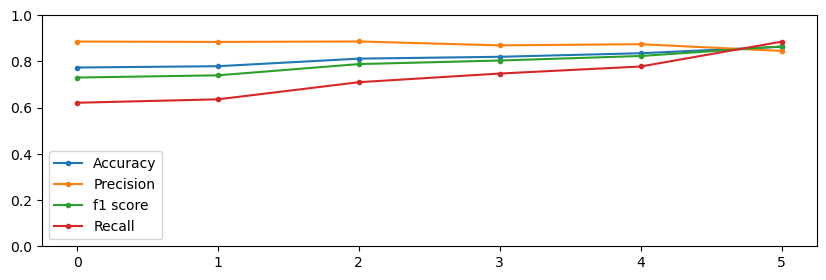

In [23]:
nbc_bow_models = []

for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 50)
    
    model = gen_nbc_model(X_train, y_train)
    nbc_bow_models.append(model)
    mod_file = r'Models/NBC/NBC_'+str(i)+'.model'
    pickle.dump(model, open(mod_file, 'wb'))

evaluate_metrics("TF-IDF-NBC", nbc_bow_models, X_test, y_test)

In [24]:
type(X_test[0])

scipy.sparse._csr.csr_matrix

### Logistic regression model one vs all

C:\Users\gyank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gyank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Scores for : TF-IDF-LR
      Model no  Accuracy  Precision  f1 score    Recall
0  TF-IDF-LR-0  0.844235   0.880208  0.832664  0.789993
1  TF-IDF-LR-1  0.848194   0.879024  0.838065  0.800753
2  TF-IDF-LR-2  0.857916   0.878753  0.850532  0.824067
3  TF-IDF-LR-3  0.856684   0.879665  0.848803  0.820032
4  TF-IDF-LR-4  0.866978   0.880168  0.861551  0.843705
5  TF-IDF-LR-5  0.896846   0.892714  0.895149  0.897597
6          Avg  0.896846   0.892714  0.895149  0.897597


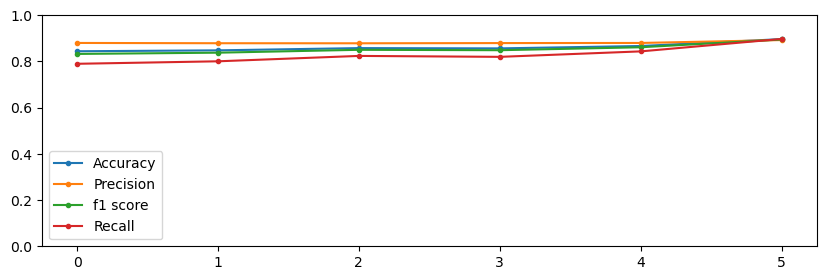

In [26]:
lr_bow_models = []
for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
    
    model = logistic_regression(X_train, y_train)
    lr_bow_models.append(model)
    mod_file = r'Models/LR/LR_'+str(i)+'.model'
    pickle.dump(model, open(mod_file, 'wb'))
    
evaluate_metrics("TF-IDF-LR", lr_bow_models, X_test, y_test)

### SVM model one vs all

In [27]:
svm_bow_models = []
for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
    
    model = gen_svm_model(X_train, y_train)
    lr_bow_models.append(model)
    mod_file = r'Models/SVM/SVM_'+str(i)+'.model'
    pickle.dump(model, open(mod_file, 'wb'))


C:\Users\gyank\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*

C:\Users\gyank\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*

C:\Users\gyank\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*

C:\Users\gyank\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*

C:\Users\gyank\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**

C:\Users\gyank\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Scores for : TF-IDF-LR
      Model no  Accuracy  Precision  f1 score    Recall
0  TF-IDF-LR-0  0.844235   0.880208  0.832664  0.789993
1  TF-IDF-LR-1  0.848194   0.879024  0.838065  0.800753
2  TF-IDF-LR-2  0.857916   0.878753  0.850532  0.824067
3  TF-IDF-LR-3  0.856684   0.879665  0.848803  0.820032
4  TF-IDF-LR-4  0.866978   0.880168  0.861551  0.843705
5  TF-IDF-LR-5  0.896846   0.892714  0.895149  0.897597
6  TF-IDF-LR-6  0.841068   0.874367  0.829744  0.789455
7  TF-IDF-LR-7  0.842476   0.870582  0.832405  0.797435
8  TF-IDF-LR-8  0.849250   0.868524  0.841585  0.816266
9  TF-IDF-LR-9  0.852593   0.875301  0.844465  0.815728


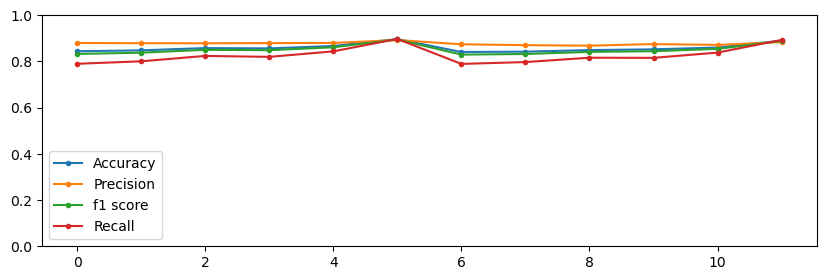

In [31]:
evaluate_metrics("TF-IDF-LR", lr_bow_models, X_test, y_test)

Scores for : TF-IDF-RF
      Model no  Accuracy  Precision  f1 score    Recall
0  TF-IDF-RF-0  0.767783   0.808813  0.744494  0.689652
1  TF-IDF-RF-1  0.758765   0.794350  0.736092  0.685796
2  TF-IDF-RF-2  0.780319   0.815407  0.761213  0.713773
3  TF-IDF-RF-3  0.780319   0.811325  0.762665  0.719512
4  TF-IDF-RF-4  0.819250   0.843997  0.807892  0.774749
5  TF-IDF-RF-5  0.820877   0.871693  0.803057  0.744440
6          Avg  0.820877   0.871693  0.803057  0.744440


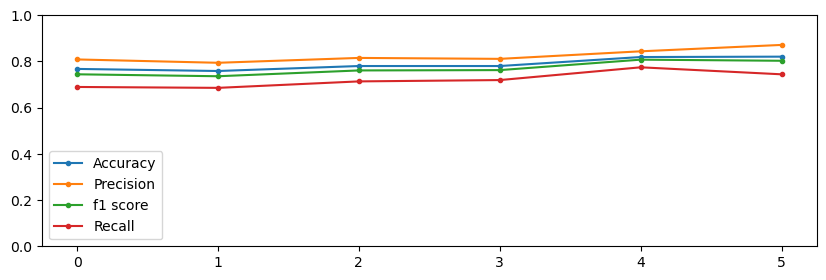

In [30]:
rf_bow_models = []
for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
    model = random_forest(X_train, y_train)
    rf_bow_models.append(model)
    mod_file = r'Models/RF/RF_'+str(i)+'.model'
    pickle.dump(model, open(mod_file, 'wb'))
    
evaluate_metrics("TF-IDF-RF", rf_bow_models, X_test, y_test)

In [ ]:
print(X_train[0].shape)

In [ ]:
evaluate_metrics("TF-IDF-SVM", svm_bow_models, X_test, y_test)